# **<font color=white> 06.Isolation Forest Code 실습**

[목적]
  - Isolation Forest Code 실습
  - Multivariate variable (다변량)일 때 사용
  - 각 Data마다 Score를 계산하여 Abnormal을 산출 할 수 있음
  
[Process]
  1. Define Data
  2. Modeling
  3. Plotting

In [1]:
%pip install pyod

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pyod.utils.data import generate_data, get_outliers_inliers
from sklearn.ensemble import IsolationForest

In [3]:
# Data Loading
X, Y = generate_data(behaviour='new', n_features=10, 
                     train_only=True,
                     contamination=0.1,
                     random_state=2023)

In [4]:
# Naming for columns
col_list = []
for i in range(X.shape[1]):
    a = 'X{}'.format(i+1)
    col_list.append(a)

In [5]:
# Columns Name
col_list

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']

In [6]:
# Make DF
df = pd.DataFrame(X, columns = col_list)
df['Y'] = Y

In [7]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,8.147125,6.595282,6.353558,6.653506,8.134808,7.426514,6.474067,7.230509,7.457418,6.916700,0.0
1,6.872178,6.596448,7.349710,7.097543,7.024347,6.615302,6.753538,7.218030,7.819604,6.563562,0.0
2,6.910465,5.856827,6.495701,6.598612,8.042650,6.205240,7.024534,6.822316,7.475852,7.106808,0.0
3,6.901166,6.942458,6.354764,6.447391,6.595218,7.941335,6.104982,6.930397,8.076817,7.715245,0.0
4,7.465372,6.305800,7.858624,6.456638,7.610647,6.530033,7.509274,7.636209,7.650121,7.043726,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.018529,5.163813,5.468692,-2.640285,-0.578817,1.487439,2.359938,-6.462774,2.466932,1.323520,1.0
996,3.328107,0.614357,5.886779,6.717434,2.906959,-6.980421,2.245124,-2.790132,-4.169568,0.832299,1.0
997,4.516967,-5.648011,-5.330594,-6.352683,-1.796092,5.129173,3.517025,-0.234736,1.941775,5.095802,1.0
998,2.223976,-4.295404,2.192168,1.202558,5.348682,3.638888,5.204538,2.540078,-5.530535,5.884657,1.0


Text(0.5, 1.0, 'Ground Truth')

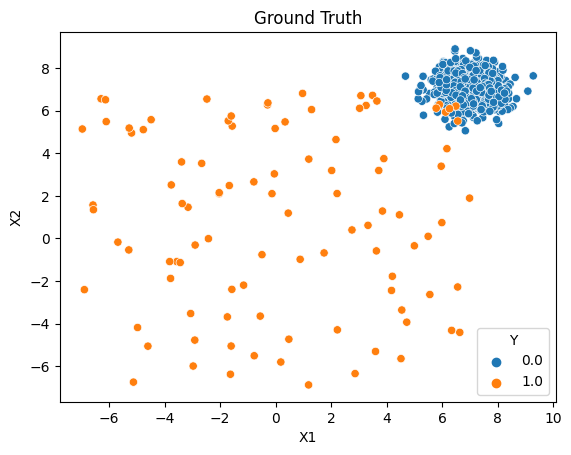

In [8]:
# Data 분포 확인하기 X1, X2
sns.scatterplot(x='X1', y='X2', hue='Y', data=df);
plt.title('Ground Truth')

[Isolation Forest Parameter]
  - package : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
  - n_estimators : 원하는 기본 estimators 수, default=100
  - max_samples : 하나의 estimator에 들어가는 sample 수(int or float)
      - If int, then draw max_samples samples.
      - If float, then draw max_samples * X.shape[0] samples.
      - If “auto”, then max_samples=min(256, n_samples).
      - default='auto'
  - contamination : 데이터 세트 내 이상치 개수 비율('auto' or float) 
      - default='auto'
  - max_features : estimator의 최대 columns 수(int or float), default=1.0
      - If int, then draw max_features features.
      - If float, then draw max(1, int(max_features * n_features_in_)) features.
      - default=1.0
  - bootstrap : 데이터 중복(bootstrap)할 것인지 여부(boolean), 
      - default=False
      - 이상치가 안 뽑힐 수 있기 때문에 추천하지 않음

In [9]:
# Isolation Forest Setup
IF = IsolationForest(n_estimators = 150, max_samples = 500, contamination = 0.1)
IF.fit(df[['X1', 'X2']])
y_pred = IF.predict(df[['X1', 'X2']])

for i in range(y_pred.shape[0]):
    if y_pred[i] == 1:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

n_errors = (y_pred != df['Y']).sum()

In [10]:
n_errors

12

In [11]:
# Opposite of the anomaly score defined in the original paper.
X_scores = IF.score_samples(df[['X1', 'X2']])

In [12]:
X_scores

array([-0.43699755, -0.36428787, -0.41519594, -0.35316232, -0.38632813,
       -0.36011711, -0.36296298, -0.4064461 , -0.38122658, -0.36425389,
       -0.36292288, -0.38034278, -0.38372495, -0.37394619, -0.53713276,
       -0.36086355, -0.35417061, -0.39187415, -0.42235553, -0.39104195,
       -0.39696048, -0.37934927, -0.35718131, -0.36913965, -0.46291531,
       -0.39855295, -0.38959664, -0.38698454, -0.36892161, -0.48817733,
       -0.35832605, -0.3932802 , -0.35559289, -0.37182986, -0.39607043,
       -0.37518399, -0.39574886, -0.43244547, -0.4258822 , -0.44676975,
       -0.37494468, -0.35541016, -0.41467634, -0.35296941, -0.36596911,
       -0.3686743 , -0.40378136, -0.44138068, -0.36582904, -0.35505031,
       -0.36394945, -0.36750276, -0.38274365, -0.37159351, -0.41912654,
       -0.35966932, -0.38314793, -0.37301889, -0.39206107, -0.42848818,
       -0.36898824, -0.36844954, -0.53939613, -0.35666242, -0.36637532,
       -0.35373974, -0.49899825, -0.37108594, -0.38744732, -0.38

In [13]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

In [14]:
radius

array([2.20574223e-01, 3.29438347e-02, 1.64314262e-01, 4.23389402e-03,
       8.98196511e-02, 2.21810188e-02, 2.95249101e-02, 1.41734919e-01,
       7.66548810e-02, 3.28561472e-02, 2.94214219e-02, 7.43742132e-02,
       8.31020420e-02, 5.78675374e-02, 4.78977359e-01, 2.41072431e-02,
       6.83581153e-03, 1.04131399e-01, 1.82789873e-01, 1.01983867e-01,
       1.17256876e-01, 7.18104036e-02, 1.46050700e-02, 4.54640692e-02,
       2.87456086e-01, 1.21366309e-01, 9.82541958e-02, 9.15135510e-02,
       4.49014118e-02, 3.52645792e-01, 1.75591145e-02, 1.07759769e-01,
       1.05060888e-02, 5.24062521e-02, 1.14960062e-01, 6.10617426e-02,
       1.14130241e-01, 2.08827402e-01, 1.91890593e-01, 2.45791786e-01,
       6.04441739e-02, 1.00345405e-02, 1.62973397e-01, 3.73606942e-03,
       3.72823556e-02, 4.42632003e-02, 1.34858457e-01, 2.31885065e-01,
       3.69208820e-02, 9.10591449e-03, 3.20705314e-02, 4.12399858e-02,
       8.05697491e-02, 5.17963608e-02, 1.74457331e-01, 2.10254674e-02,
      

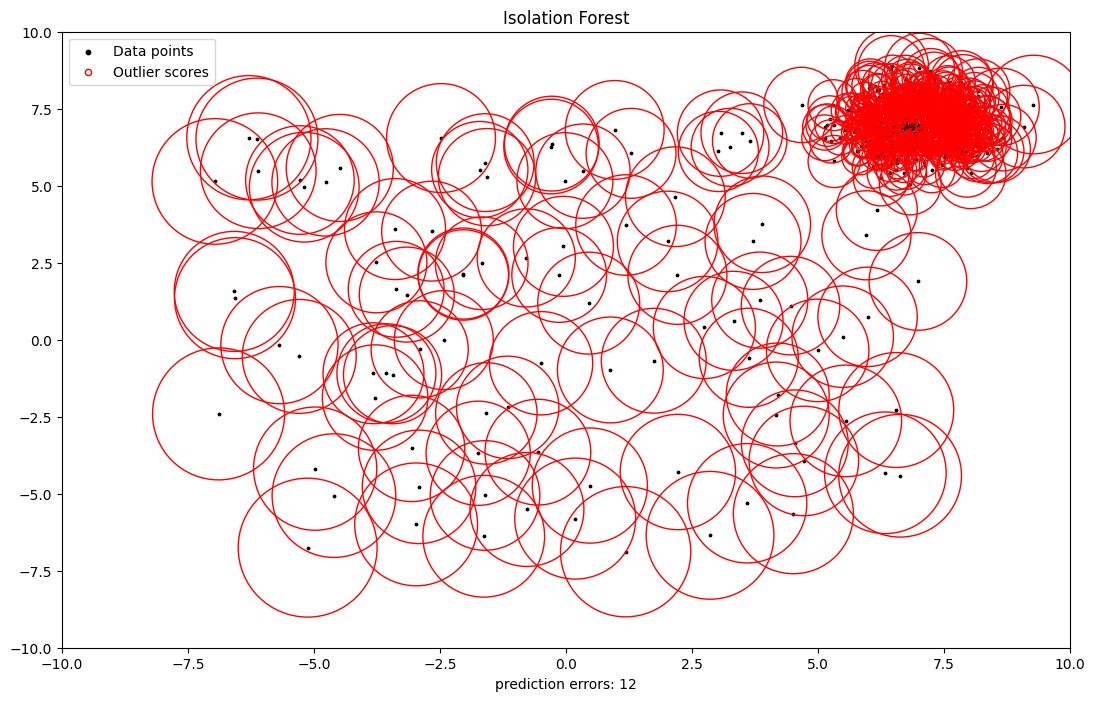

In [15]:
plt.figure(figsize=(13,8))
plt.title("Isolation Forest")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    df.iloc[:, 0],
    df.iloc[:, 1],
    s=10000 * radius**2,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

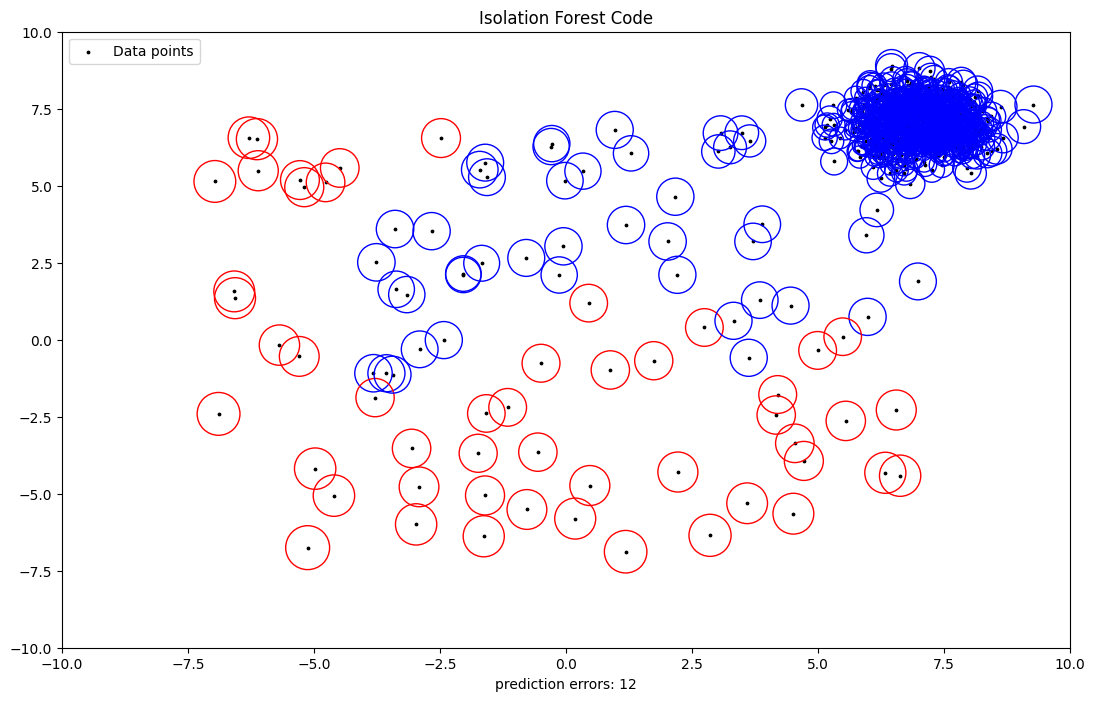

In [16]:
plt.figure(figsize=(13,8))
plt.title("Isolation Forest Code")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) # MinMax Scale

for i in range(df.shape[0]):
    if radius[i] >= np.percentile(radius, 95):
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i],
            edgecolors="r",
            facecolors="none",
            #label="Outlier scores",
        )
    elif radius[i] < np.percentile(radius, 95):
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i],
            edgecolors="b",
            facecolors="none",
            #label="Outlier scores",
        )

plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()

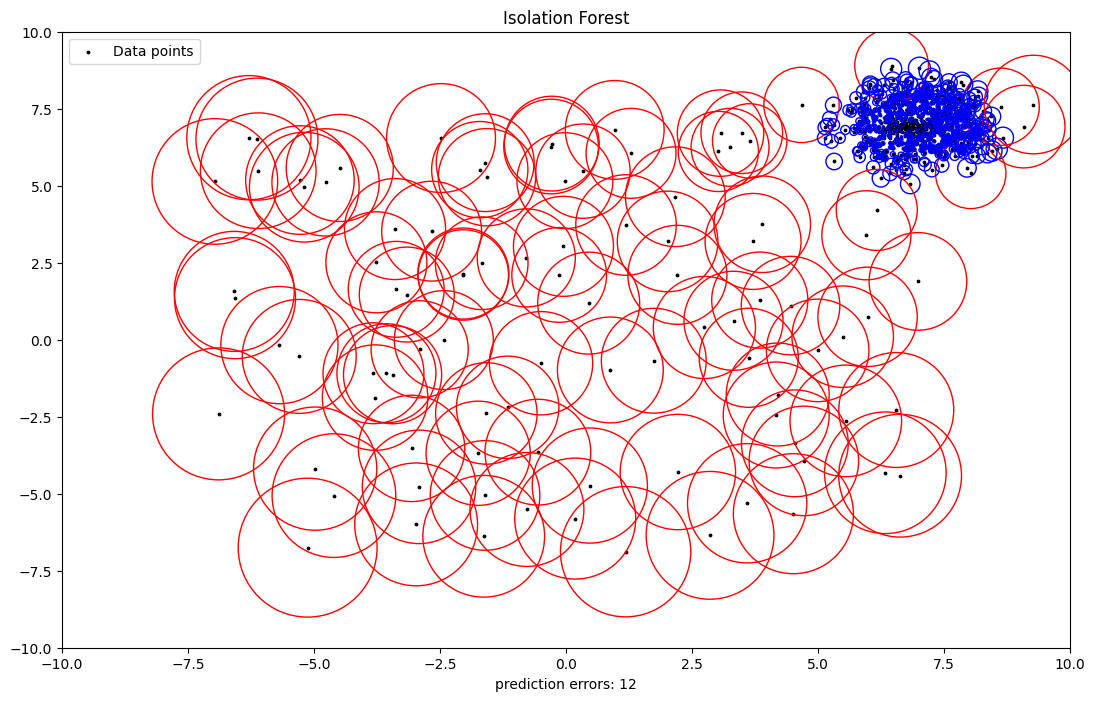

In [17]:
plt.figure(figsize=(13,8))
plt.title("Isolation Forest")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) # MinMax Scale

for i in range(df.shape[0]):
    if y_pred[i] == 1:
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=10000 * radius[i]**2,
            edgecolors="r",
            facecolors="none",
            #label="Outlier scores",
        )
    elif y_pred[i] == 0:
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i]**2,
            edgecolors="b",
            facecolors="none",
            #label="Outlier scores",
        )

plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()

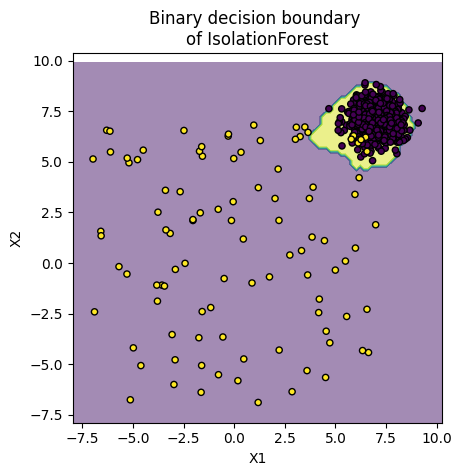

In [18]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    IF,
    df[['X1','X2']],
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, -1], s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.show()